In [1]:
import numpy as np
import scipy.stats as sps
import simulate as sim
from importlib import reload

In [2]:
from scipy.stats import norm

In [3]:
def n(x, m, s):
    return norm.pdf(x, m, s)

In [4]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 1000

dt = 1/250

In [5]:
true_params = [r, 2.2, 0.01, 0.3, 0.6, 0.02]

In [6]:
mu = true_params[0]
kappa = true_params[1]
theta = true_params[2]
sigma = true_params[3]
rho = true_params[4]
v0 = true_params[5]

In [7]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

In [8]:
import matplotlib.pyplot as plt

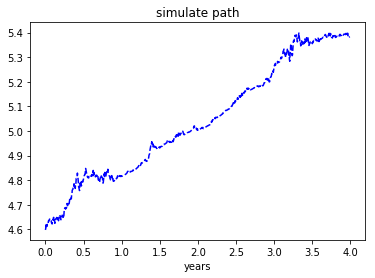

In [9]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

In [10]:
def proposal_sample(N, x_prev, y, dy):
    """
    x_prev is array of particles
    """
    m = x_prev + kappa*(theta-x_prev)*dt + sigma*rho*(dy - (mu-1/2*x_prev)*dt)
    s = sigma*np.sqrt(x_prev*(1-rho**2)*dt)
    return norm.rvs(m, s, N)

In [11]:
dy = y[0,1]-y[0,0]
n_particles = 1000
x_prev = np.array([v0] * n_particles)
particles = proposal_sample(n_particles, v0, y[0,1], dy)

In [12]:
def proposal(x, x_prev, y, dy):
    m = x_prev + kappa*(theta-x_prev)*dt + sigma*rho*(dy - (mu-1/2*x_prev)*dt)
    s = sigma*np.sqrt(x_prev*(1-rho**2)*dt)
    return norm.pdf(x, m, s)

In [13]:
def likelihood(y, x, x_prev, y_prev):
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x_prev*dt)
    return norm.pdf(y, m ,s)

In [14]:
def transition(x, x_prev):
    m = 1/(1+1/2*sigma*rho*dt) * (x_prev + kappa*(theta-x_prev)*dt + 1/2*sigma*rho*x_prev*dt)
    s = 1/(1+1/2*sigma*rho*dt) * sigma * np.sqrt(x_prev*dt)
    return norm.pdf(x, m, s)

In [15]:
# calc weights through SIS
weights = likelihood(y[0,1], particles, x_prev, y[0,0])*transition(particles, x_prev)/proposal(particles, x_prev, y[0,1], dy)
weights = weights/sum(weights)

In [16]:
# SIR
cumulative_sum = np.cumsum(weights)
cumulative_sum[-1] = 1. # avoid round-off error
indexes = np.searchsorted(cumulative_sum, np.random.rand(len(weights)))

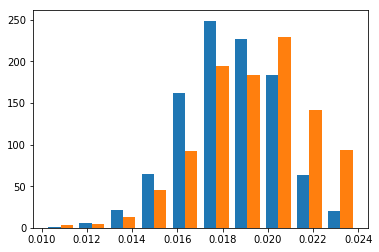

In [17]:
plt.hist([particles, particles[indexes]])
plt.show()

In [18]:
particles = particles[indexes]

In [19]:
p2 = particles

In [20]:
y_hat = y[0,0] + (mu-1/2*p2)*dt + np.sqrt(x_prev)*norm.rvs(0, np.sqrt(dt), len(p2))

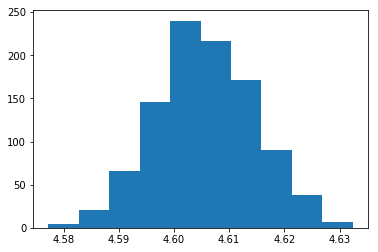

In [21]:
plt.hist(y_hat)
plt.show()

In [22]:
def prediction_density(y, y_prev, x):
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x*dt)
    return norm.pdf(y, m, s)

In [23]:
py_hat = [np.mean(prediction_density(y_hat[i], y[0,0], p2)) for i in range(len(y_hat))]
py_hat = np.array(py_hat)/sum(py_hat)

(array([ 244.16582155,  376.71298182,  306.95131852,  334.85598384,
         537.16480741,  488.3316431 ,  634.83113603,  739.47363098,
        1025.4964505 , 2288.18255623]),
 array([7.79185129e-06, 1.51137057e-04, 2.94482263e-04, 4.37827469e-04,
        5.81172675e-04, 7.24517882e-04, 8.67863088e-04, 1.01120829e-03,
        1.15455350e-03, 1.29789871e-03, 1.44124391e-03]),
 <a list of 10 Patch objects>)

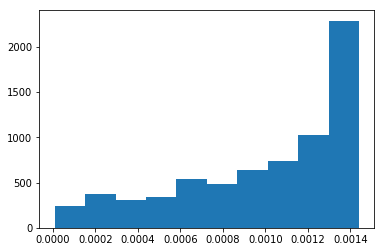

In [24]:
plt.hist(py_hat, density=30)

In [25]:
np.sum(py_hat*y_hat)

4.605695225787165

In [26]:
np.sum(particles*weights)

0.019432710466057438

In [27]:
import particle_filter as pf

In [312]:
reload(pf)

<module 'particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/particle_filter.py'>

In [317]:
pf_heston = pf.PFHeston(np.array(y[0, :])[0], N=2000)

In [318]:
obs, hidden = pf_heston.filter(np.array(y[0, :])[0], true_params)

done with step: 1
done with step: 2
done with step: 3
done with step: 4
done with step: 5
done with step: 6
done with step: 7
done with step: 8
done with step: 9
done with step: 10
done with step: 11
done with step: 12
done with step: 13
done with step: 14
done with step: 15
done with step: 16
done with step: 17
done with step: 18
done with step: 19
done with step: 20
done with step: 21
done with step: 22
done with step: 23
done with step: 24
done with step: 25
done with step: 26
done with step: 27
done with step: 28
done with step: 29
done with step: 30
done with step: 31
done with step: 32
resampling since: 2.9301460590434862
done with step: 33
done with step: 34
done with step: 35
done with step: 36
done with step: 37
done with step: 38
done with step: 39
done with step: 40
done with step: 41
done with step: 42
done with step: 43
done with step: 44
done with step: 45
done with step: 46
done with step: 47
done with step: 48
done with step: 49
done with step: 50
done with step: 51
don

done with step: 415
done with step: 416
done with step: 417
done with step: 418
done with step: 419
done with step: 420
done with step: 421
done with step: 422
done with step: 423
done with step: 424
done with step: 425
done with step: 426
done with step: 427
done with step: 428
done with step: 429
done with step: 430
done with step: 431
done with step: 432
done with step: 433
done with step: 434
done with step: 435
done with step: 436
done with step: 437
done with step: 438
done with step: 439
done with step: 440
done with step: 441
done with step: 442
done with step: 443
done with step: 444
done with step: 445
done with step: 446
done with step: 447
done with step: 448
done with step: 449
done with step: 450
done with step: 451
done with step: 452
done with step: 453
done with step: 454
done with step: 455
done with step: 456
done with step: 457
done with step: 458
done with step: 459
done with step: 460
done with step: 461
done with step: 462
done with step: 463
done with step: 464


done with step: 825
done with step: 826
done with step: 827
done with step: 828
done with step: 829
done with step: 830
done with step: 831
done with step: 832
done with step: 833
done with step: 834
done with step: 835
done with step: 836
done with step: 837
done with step: 838
done with step: 839
done with step: 840
done with step: 841
done with step: 842
done with step: 843
done with step: 844
done with step: 845
done with step: 846
done with step: 847
done with step: 848
done with step: 849
done with step: 850
done with step: 851
done with step: 852
done with step: 853
done with step: 854
done with step: 855
done with step: 856
done with step: 857
done with step: 858
done with step: 859
done with step: 860
done with step: 861
done with step: 862
done with step: 863
done with step: 864
done with step: 865
done with step: 866
done with step: 867
done with step: 868
done with step: 869
done with step: 870
done with step: 871
done with step: 872
done with step: 873
done with step: 874


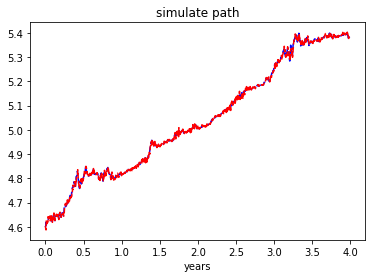

In [321]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, obs[1:], 'r--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[67]]


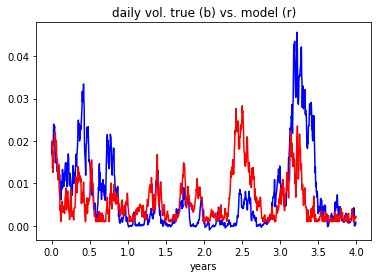

In [322]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], hidden[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

([array([494., 198., 109.,  60.,  46.,  37.,  28.,  14.,   7.,   7.]),
  array([182., 183., 154., 125., 106., 103.,  62.,  49.,  26.,  11.])],
 array([-0.00095725,  0.00371655,  0.00839035,  0.01306416,  0.01773796,
         0.02241176,  0.02708556,  0.03175936,  0.03643316,  0.04110696,
         0.04578076]),
 <a list of 2 Lists of Patches objects>)

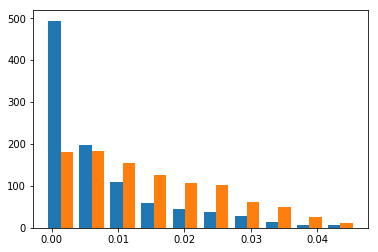

In [282]:
plt.hist([np.array(y[1,1:])[0], hidden])

In [356]:
sigma*rho*(y[0,1]-y[0,0]-(mu-1/2*v0)*dt)

0.00019289914950133016